In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import string 
import numpy as np
from string import punctuation
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
raw_articles = pd.read_csv("data/articles.csv")
raw_customers = pd.read_csv("data/customers.csv")
raw_transactions = pd.read_csv("data/transactions_train.csv")

In [3]:
articles = raw_articles.copy()
customers = raw_customers.copy()
transactions = raw_transactions.copy()

In [4]:
articles.head().T

,0,1,2,3,4
article_id,108775015,108775044,108775051,110065001,110065002
product_code,108775,108775,108775,110065,110065
prod_name,Strap top,Strap top,Strap top (1),OP T-shirt (Idro),OP T-shirt (Idro)
product_type_no,253,253,253,306,306
product_type_name,Vest top,Vest top,Vest top,Bra,Bra
product_group_name,Garment Upper body,Garment Upper body,Garment Upper body,Underwear,Underwear
graphical_appearance_no,1010016,1010016,1010017,1010016,1010016
graphical_appearance_name,Solid,Solid,Stripe,Solid,Solid
colour_group_code,9,10,11,9,10
colour_group_name,Black,White,Off White,Black,White


In [12]:
customers.head(2).T

,0,1
customer_id,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...
FN,NaN,NaN
Active,NaN,NaN
club_member_status,ACTIVE,ACTIVE
fashion_news_frequency,NONE,NONE
age,49.0,25.0
postal_code,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...


In [13]:
transactions.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2
6,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1
9,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746,2


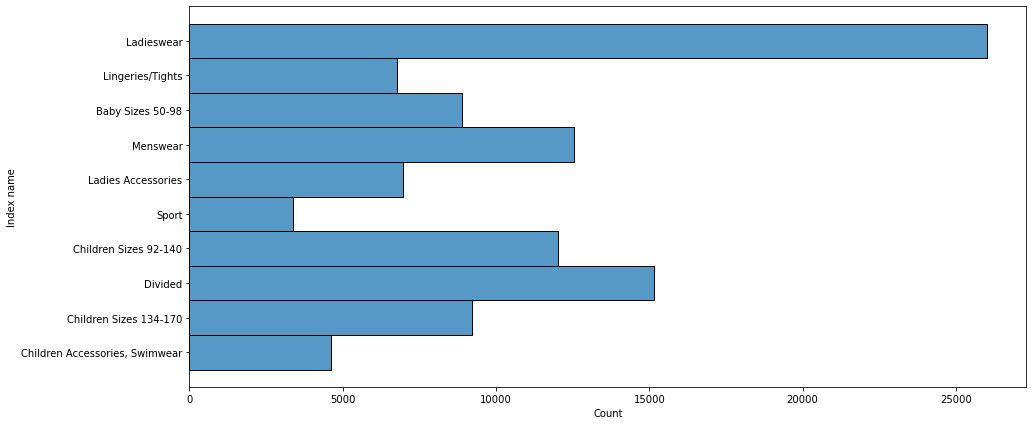

In [15]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', palette='mako')
ax.set_xlabel('Count')
ax.set_ylabel('Index name')
plt.show()

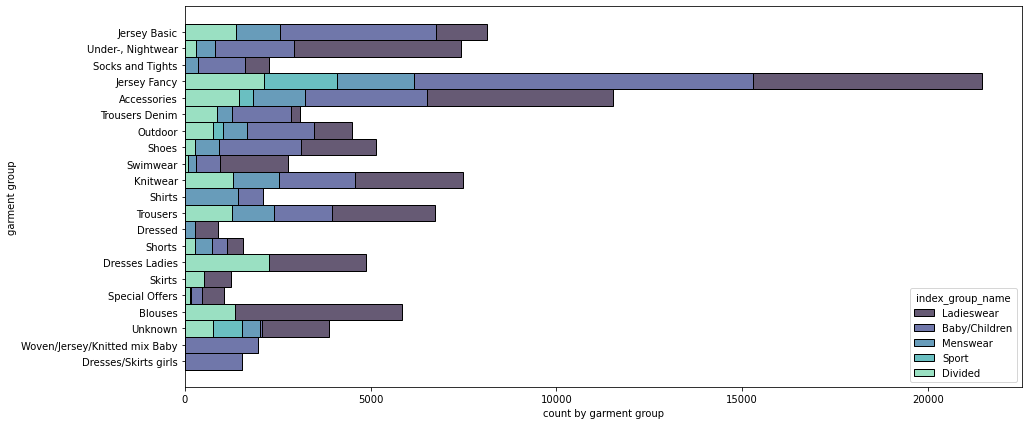

In [16]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', palette='mako', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

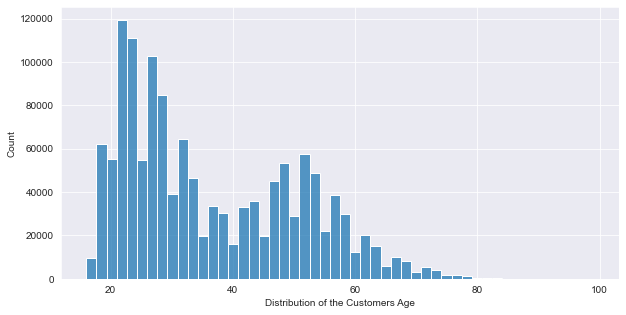

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, palette='mako')
ax.set_xlabel('Distribution of the Customers Age')
plt.show()

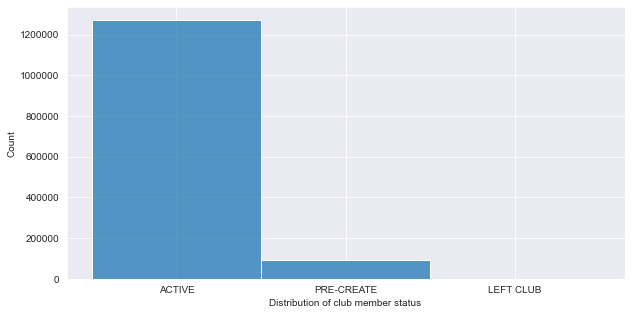

In [20]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', palette='mako')
ax.set_xlabel('Distribution of club member status')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

In [6]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [7]:
articles = articles.dropna()

In [8]:
articles["text"] = articles["prod_name"].map(str) + " " + articles["product_type_name"] +" "+ articles["product_group_name"]+ " "+ articles['graphical_appearance_name']+" "+ articles['colour_group_name'] +" "+ articles['perceived_colour_value_name']+ " " + articles["perceived_colour_master_name"] +" "+ articles["department_name"]+ " "+ articles['index_name']+" "+articles['index_group_name'] +" "+articles['section_name']+ " "+ articles['garment_group_name']+" "+articles['detail_desc']

In [9]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105126 entries, 0 to 105541
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105126 non-null  int64 
 1   product_code                  105126 non-null  int64 
 2   prod_name                     105126 non-null  object
 3   product_type_no               105126 non-null  int64 
 4   product_type_name             105126 non-null  object
 5   product_group_name            105126 non-null  object
 6   graphical_appearance_no       105126 non-null  int64 
 7   graphical_appearance_name     105126 non-null  object
 8   colour_group_code             105126 non-null  int64 
 9   colour_group_name             105126 non-null  object
 10  perceived_colour_value_id     105126 non-null  int64 
 11  perceived_colour_value_name   105126 non-null  object
 12  perceived_colour_master_id    105126 non-null  int64 
 13 

In [11]:
df_all.head()

,article_id,product_code,text
0,108775015,108775,Strap top Vest top Garment Upper body Solid Bl...
1,108775044,108775,Strap top Vest top Garment Upper body Solid Wh...
2,108775051,108775,Strap top (1) Vest top Garment Upper body Stri...
3,110065001,110065,OP T-shirt (Idro) Bra Underwear Solid Black Da...
4,110065002,110065,OP T-shirt (Idro) Bra Underwear Solid White Li...


In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105126 entries, 0 to 105541
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105126 non-null  int64 
 1   product_code  105126 non-null  int64 
 2   text          105126 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


Text Preprocessing

In [26]:
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text) 
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [25]:
df_all['text'] = df_all['text'].apply(clean_txt)

TF-IDF Vectorizer

In [61]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_article = tfidf_vectorizer.fit_transform((df_all['text'])) 
tfidf_article

<105126x13312 sparse matrix of type '<class 'numpy.float64'>'
	with 2944800 stored elements in Compressed Sparse Row format>

In [62]:
print(tfidf_article)

  (0, 10681)	0.15950967790183795
  (0, 8120)	0.19309729263647726
  (0, 946)	0.1976701015233086
  (0, 3885)	0.20577542954718037
  (0, 13053)	0.12737570429442102
  (0, 6472)	0.234975056782296
  (0, 945)	0.4010641493446284
  (0, 5833)	0.351460162024683
  (0, 3037)	0.10552081779227535
  (0, 1249)	0.3001490138060433
  (0, 11032)	0.10255696639845747
  (0, 1348)	0.07880988395787426
  (0, 12486)	0.11299889900784989
  (0, 4574)	0.07892359273954642
  (0, 12619)	0.2629159100855234
  (0, 12087)	0.3821643881701229
  (0, 11338)	0.38459520847797474
  (1, 6756)	0.11481297779255285
  (1, 12932)	0.3593512490513873
  (1, 10681)	0.15582069735453233
  (1, 8120)	0.18863153127551635
  (1, 946)	0.19309858480472955
  (1, 3885)	0.20101646089588537
  (1, 13053)	0.12442988620035753
  (1, 6472)	0.22954078831047722
  :	:
  (105125, 4486)	0.1353689788885709
  (105125, 3423)	0.3983249987242577
  (105125, 12472)	0.16379217168142257
  (105125, 8158)	0.13016592783259032
  (105125, 2866)	0.11022646413285817
  (105125, 11

In [31]:
transactions = transactions.dropna()

In [32]:
transactions =  transactions.sort_values(by='customer_id')
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
14479579,2019-07-25,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,745232001,0.021169,1
23574622,2020-03-21,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,890498002,0.031763,2
23574621,2020-03-21,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,887593002,0.021593,2
23574620,2020-03-21,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,841260003,0.011508,2
4212358,2018-12-27,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,0.044051,1


In [33]:
merged_df = df_all.merge(transactions, how = 'inner', on = ['article_id'])

In [34]:
merged_df2 = merged_df.groupby('customer_id', sort=False)['text'].apply(' '.join).reset_index()
merged_df2.head(5)

,customer_id,text
0,000f7535bdc611ad136a9f04746d6b1431f50a7f60fbbe...,strap top vest top garment upper body solid bl...
1,001ae5408a043f64bccd32beffe2730151414cbdf18a6e...,strap top vest top garment upper body solid bl...
2,001ba9e81e13ce12a2585d9ebde923fe74429e9e12ea59...,strap top vest top garment upper body solid bl...
3,0022a721371d5949d174ecba60346d89a9d6c08c0fba4f...,strap top vest top garment upper body solid bl...
4,002323971cbd38fad4512d5114676e5e17eb262db02320...,strap top vest top garment upper body solid bl...


In [36]:
u = "000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318" #customer_id
index = np.where(merged_df2['customer_id'] == u)[0][0]
cust_q = merged_df2.iloc[[index]]
cust_q

,customer_id,text
317613,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,lazer razer brief swimwear bottom swimwear sol...


In [37]:
transactions.loc[transactions['customer_id'] == u]

,t_dat,customer_id,article_id,price,sales_channel_id
24773518,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,858883002,0.030492,2
24773520,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,750424014,0.042356,2
24773521,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,750424014,0.042356,2
24773522,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,870304002,0.033881,2
24773523,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,870304002,0.033881,2
24773524,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,852643001,0.025407,2
24773525,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,852643003,0.025407,2
21953952,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,2
21953951,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,2
24773519,2020-04-18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,851400006,0.059305,2


Recommendation Function

In [46]:
def recommendation_product(top, df_all, scores):
    recommendation = pd.DataFrame(columns = ['customer_id', 'article_id',  'product_code', 'detail_desc', 'score'])
    count = 0
    for i in top:
        recommendation.at[count, 'customer_id'] = u
        recommendation.at[count, 'article_id'] = df_all['article_id'][i]
        recommendation.at[count, 'product_code'] = df_all['product_code'][i]
        recommendation.at[count, 'detail_desc'] = articles['detail_desc'][i]   
        recommendation.at[count, 'score'] =  scores[count]
        count += 1
    #print("recommendations generated")        
    return recommendation

In [70]:
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_article)
cos_similarity_tfidf

In [71]:
output2 = list(cos_similarity_tfidf)

Recommendation with TF-IDF

In [57]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:13]
tf_list_scores = [output2[i][0][0] for i in top]
recommendation_product(top, df_all, tf_list_scores)

recommendations generated


,customer_id,article_id,product_code,detail_desc,score
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,821648004,821648,Quilted top in sturdy sweatshirt fabric with a...,0.557127
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,821648003,821648,Quilted top in sturdy sweatshirt fabric with a...,0.544008
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,662879008,662879,Fancy dress cape in jersey with a concealed ho...,0.536211
3,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,721991003,721991,Long-sleeved top in cotton jersey with a print...,0.535286
4,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,721991004,721991,Long-sleeved top in cotton jersey with a print...,0.523437
5,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,458428031,458428,5-pocket jeans in washed stretch denim with a ...,0.516344
6,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,458428037,458428,5-pocket jeans in washed stretch denim with a ...,0.516344
7,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,865034001,865034,"Short, wide dress in airy, patterned chiffon w...",0.506835
8,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,589832001,589832,"Short, fitted off-the-shoulder dress in stretc...",0.50571
9,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,756859003,756859,Romper suit in soft cotton jersey with a print...,0.505697


In [63]:
tf_idf_score=pd.DataFrame(recommendation_product(top, df_all, tf_list_scores), columns = ['article_id', 'detail_desc', 'score'])

recommendations generated


In [64]:
tf_idf_score.head(13)

,article_id,detail_desc,score
0,821648004,Quilted top in sturdy sweatshirt fabric with a...,0.557127
1,821648003,Quilted top in sturdy sweatshirt fabric with a...,0.544008
2,662879008,Fancy dress cape in jersey with a concealed ho...,0.536211
3,721991003,Long-sleeved top in cotton jersey with a print...,0.535286
4,721991004,Long-sleeved top in cotton jersey with a print...,0.523437
5,458428031,5-pocket jeans in washed stretch denim with a ...,0.516344
6,458428037,5-pocket jeans in washed stretch denim with a ...,0.516344
7,865034001,"Short, wide dress in airy, patterned chiffon w...",0.506835
8,589832001,"Short, fitted off-the-shoulder dress in stretc...",0.50571
9,756859003,Romper suit in soft cotton jersey with a print...,0.505697
